In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/piyushghai/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
import cPickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import re
import scipy as sp
import seaborn


In [37]:
plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()

In [15]:
## Reading in the dataset. The dataset's already been preprocessed and converted to csv from json structure
business_data = pd.read_csv("Data/yelp_academic_dataset_business.csv", dtype=unicode)
review_data = pd.read_csv("Data/yelp_academic_dataset_review.csv")


In [16]:
#len(review_data)
#len(business_data)
#Filtering out on restaurants from the dataset. 
business_data = business_data[business_data['categories'].str.contains('Restaurants')]

In [17]:
review_data = review_data.merge(business_data,
                                         left_on='business_id',
                                         right_on='business_id',
                                         suffixes=('_review', '_business'))

In [18]:
# Further filtering. We are only interested in text of reviews and the awarded rating in a review
review_data = review_data.ix[:,['text','stars_review']]

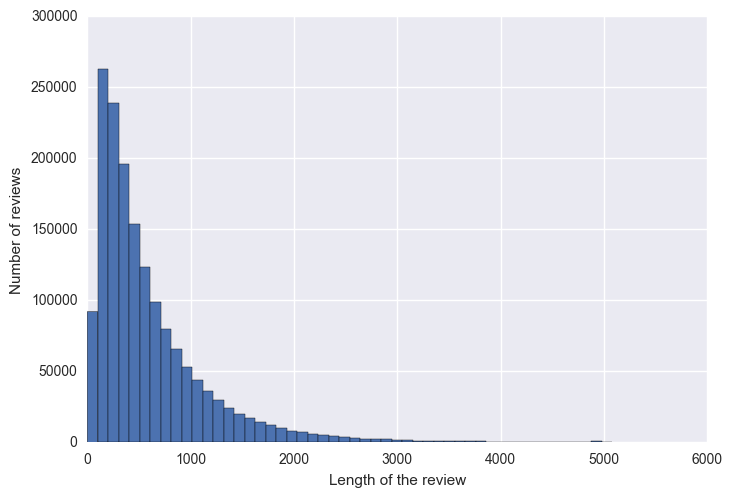

In [38]:
review_data.text.dropna().str.len().hist(bins=50)
xlabel('Length of the review')
ylabel('Number of reviews')

In [46]:
minReviewLen = 0
resto_review_reduced = review_data[review_data.text.str.len() > minReviewLen]

In [47]:
maxReviewLen = 500  #Gives approximately a million records. We can do this for entire range too, but that would be ~2 million records and fried laptop!
resto_review_reduced = resto_review_reduced[resto_review_reduced.text.str.len() < maxReviewLen]

In [50]:
# Converting it to float for further model processing
resto_review_reduced.stars_review = resto_review_reduced.stars_review.astype(float)

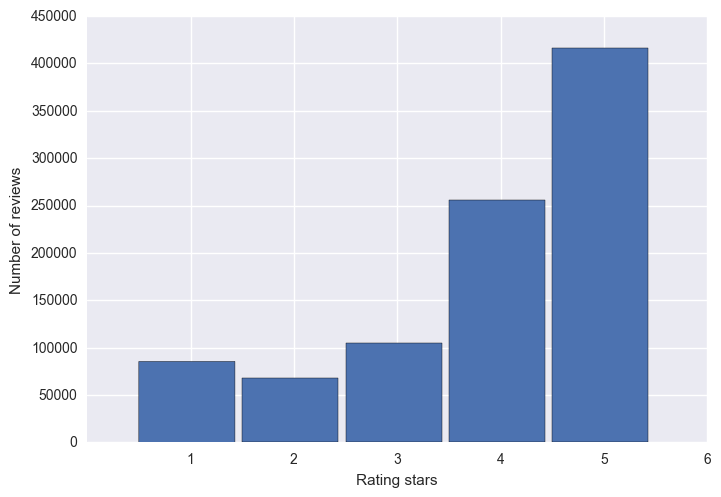

In [52]:
#Histogram for number of reviews v/s their rating
bins = [1, 2, 3 ,4, 5, 6]
resto_review_reduced.stars_review.hist(bins=bins, align='left', width=0.93)
xticks(bins)
xlabel('Rating stars')
ylabel('Number of reviews')

In [53]:
len(review_data)
len(business_data)

26729

In [54]:
list(review_data)

['text', 'stars_review']